In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Cargamos dataset
df_orders = pd.read_csv('data_sets/olist_orders_dataset.csv')
df_order_copia = df_orders.copy()


print(df_order_copia.head())



                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [24]:
#Vemos la informacion del dataset
df_order_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
df_order_items = pd.read_csv('data_sets/olist_order_items_dataset.csv')
df_items_copia = df_order_items 

print(df_items_copia.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [25]:
#Vemos la informacion del dataset
df_items_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
# Revisamos los valores nulos en df_orders
print(df_order_copia.isnull().sum())


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [30]:
# Eliminamos las filas donde faltan datos 
df_order_copia = df_order_copia.dropna(subset=["order_delivered_customer_date", "order_delivered_carrier_date", "order_approved_at"])

# Verificamos que se hayan eliminado las filas
print(df_order_copia.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [37]:
# Revisamos los valores nulos en df_items_copia
print(df_items_copia.isnull().sum())


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [36]:
# Convertimos las columnas de fechas a formato datetime
df_order_copia['order_purchase_timestamp'] = pd.to_datetime(df_order_copia['order_purchase_timestamp'])
df_order_copia['order_delivered_customer_date'] = pd.to_datetime(df_order_copia['order_delivered_customer_date'])

# Calcular la variable objetivo: días de entrega
df_order_copia['dias_entrega'] = (df_order_copia['order_delivered_customer_date'] - df_order_copia['order_purchase_timestamp']).dt.days

# Verificamos los resultados
print(df_order_copia[['order_id', 'dias_entrega']].head())
df_order_copia.info()


                           order_id  dias_entrega
0  e481f51cbdc54678b7cc49136f2d6af7             8
1  53cdb2fc8bc7dce0b6741e2150273451            13
2  47770eb9100c2d0c44946d9cf07ec65d             9
3  949d5b44dbf5de918fe9c16f97b45f8a            13
4  ad21c59c0840e6cb83a9ceb5573f8159             2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  object        
 5   order_delivered_carrier_date   96461 non-null  object        
 6   order_delivered_customer_date  96461 non-null  dat

In [ ]:
# Calculamos cantidad de productos por pedido
order_items_qty = df_items_copia.groupby('order_id').size().reset_index(name='order_items_qty')

# Unimos los datasets
df_order_copia = df_order_copia.merge(order_items_qty, on='order_id', how='left')

# Verificamos el dataframe resultante
print(df_order_copia[['order_id', 'order_items_qty', 'dias_entrega']].head())


                           order_id  order_items_qty  dias_entrega
0  e481f51cbdc54678b7cc49136f2d6af7                1             8
1  53cdb2fc8bc7dce0b6741e2150273451                1            13
2  47770eb9100c2d0c44946d9cf07ec65d                1             9
3  949d5b44dbf5de918fe9c16f97b45f8a                1            13
4  ad21c59c0840e6cb83a9ceb5573f8159                1             2


In [39]:
# Extraer características del tiempo de compra
df_order_copia['purchase_month'] = df_order_copia['order_purchase_timestamp'].dt.month
df_order_copia['purchase_dayofweek'] = df_order_copia['order_purchase_timestamp'].dt.dayofweek

# Seleccionar las columnas de características y la variable objetivo
X = df_order_copia[['order_items_qty', 'purchase_month', 'purchase_dayofweek']]
y = df_order_copia['dias_entrega']

# Verificamos las dimensiones de X e y
print(X.shape, y.shape)


(96461, 3) (96461,)


In [40]:

# Dividimos el dataset en un conjunto de entrenamiento 80% y un conjunto de prueba 20% para evaluar el modelo después de entrenarlo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape, X_test.shape)


(77168, 3) (19293, 3)


In [41]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo usando Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 6.403843471612681


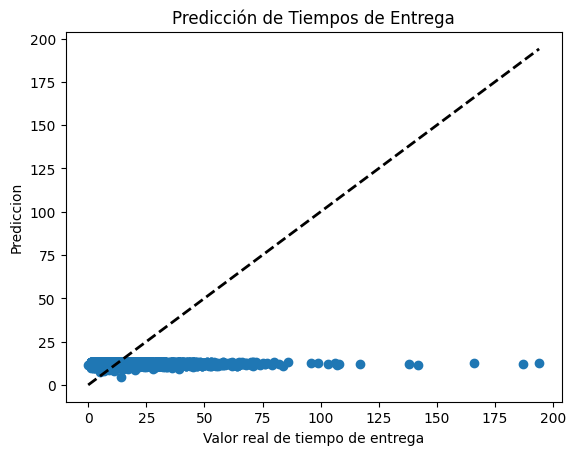

In [44]:
import matplotlib.pyplot as plt

# Visualizamos las predicciones vs los valores reales
#K es color de la linea
#lw es grosor
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor real de tiempo de entrega')
plt.ylabel('Prediccion')
plt.title('Predicción de Tiempos de Entrega')
plt.show()


